In [2]:
import os
from time import time

# Load data and Visualize

In [3]:
os.getcwd()

'e:\\WORKS\\CODE\\Artificial Intelligence\\20_newgroups_classification'

In [4]:
project_root_path = os.getcwd()
project_root_path

'e:\\WORKS\\CODE\\Artificial Intelligence\\20_newgroups_classification'

In [5]:
data_path = 'e:/WORKS/CODE/Artificial Intelligence/20_newgroups_classification/data/20_newsgroups'
data_path

'e:/WORKS/CODE/Artificial Intelligence/20_newgroups_classification/data/20_newsgroups'

In [6]:
start_time = time()
data = []
labels = []
labels_count = {}
# list all folder from root_folder
for category in os.listdir(data_path):
    
    # read each child folder in data folder
    if category.lower() != '.ds_store':
        # add label to dictationary
        labels_count[category] = 0
        for document in os.listdir(data_path + '/' + category):
            # read text file in each folder
            with open(data_path + '/' + category + "/" + document, "r", encoding="utf-8", errors="ignore") as textfile:
                contents = textfile.read() 
                # add context to list data
                data.append(contents)
                # add label to list labels
                labels.append(category)
                # count number of label
                
                labels_count[category] += 1
print("Time to load data: " + str(time() - start_time) + 's')

Time to load data: 43.98979163169861s


Load data using pandas.DataFrame

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame()
df['text'] = data
df['label'] = labels
df.head()

,text,label
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [9]:
# count the number of each label
df['label'].value_counts()

sci.crypt                   1030
comp.sys.ibm.pc.hardware    1020
talk.religion.misc          1020
talk.politics.mideast       1010
alt.atheism                 1009
comp.os.ms-windows.misc     1000
sci.space                   1000
rec.sport.hockey            1000
talk.politics.guns          1000
talk.politics.misc          1000
sci.electronics             1000
comp.sys.mac.hardware       1000
comp.windows.x              1000
rec.motorcycles             1000
comp.graphics               1000
rec.autos                   1000
rec.sport.baseball          1000
misc.forsale                1000
sci.med                     1000
soc.religion.christian       997
Name: label, dtype: int64

In [10]:
# Count the number of words
df['number_of_words'] = df['text'].apply(lambda x:len(str(x).split()))
df.head()

,text,label,number_of_words
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,1726
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,5248
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,738
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,277
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,133


In [11]:
df['number_of_words'].describe()

count    20086.000000
mean       302.340486
std        510.240732
min         21.000000
25%        126.000000
50%        195.000000
75%        314.000000
max      11839.000000
Name: number_of_words, dtype: float64

In [12]:
import re
import string

In [13]:
def clean_text_data(text):
    #clean header
    ##remove from
    text = re.sub(r'(From:\s+[^\n]+\n)','',text)
    #remove Subject
    text = re.sub(r'(Subject:\s+[^\n]+\n)','',text)
    #remove archive name
    text = re.sub(r'(([\sA-Za-z0-9\-]+)?[A|a]rchive-name:[^\n]+\n)', '', text)
    #remove Last-modified
    text = re.sub(r'(Last-modified:[^\n]+\n)', '', text)
    #remove Version
    text = re.sub(r'(Version:[^\n]+\n)', '', text)
    
    #clean text
    #lower text
    text = text.lower()
    # remove email
    text = re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)',' ', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove special characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    #remove extra space
    text = re.sub(' +',' ',text)
    # remove empty line
    text = re.sub('\n', ' ', text)
    # remove single character
    text = ' '.join([word for word in text.split() if len(word) > 1])
    return text.strip()

In [14]:
start_time = time()
df['cleaned_text'] = df['text'].apply(clean_text_data)
print("Processing time : " + str(time() - start_time) + 's')

Processing time : 53.47781157493591s


In [15]:
# Count the number of cleaned words
df['number_of_cleaned_words'] = df['cleaned_text'].apply(lambda x:len(str(x).split()))
df.head()

,text,label,number_of_words,cleaned_text,number_of_cleaned_words
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,1726,xref cantaloupe srv cs cmu edu alt atheism alt...,1638
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,5248,xref cantaloupe srv cs cmu edu alt atheism alt...,5173
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,738,newsgroups alt atheism path cantaloupe srv cs ...,725
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,277,xref cantaloupe srv cs cmu edu alt atheism alt...,278
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,133,xref cantaloupe srv cs cmu edu alt atheism soc...,138


Remove stop word

In [16]:
#import stop word dic in sklearn-lib
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)
len(ENGLISH_STOP_WORDS)

frozenset({'would', 'formerly', 'always', 'go', 'myself', 'via', 'nowhere', 'both', 'few', 'something', 'when', 'your', 'during', 'serious', 'next', 'many', 'due', 'how', 'hereupon', 'towards', 'thru', 'describe', 'had', 'back', 'get', 'hers', 're', 'sometimes', 'wherein', 'and', 'seem', 'nine', 'whom', 'yet', 'otherwise', 'namely', 'indeed', 'however', 'everywhere', 'as', 'others', 'noone', 'ie', 'after', 'a', 'afterwards', 'somewhere', 'most', 'ltd', 'hence', 'off', 'now', 'an', 'still', 'before', 'which', 'been', 'but', 'nor', 'done', 'former', 'sometime', 'bill', 'could', 'nobody', 'same', 'everything', 'becomes', 'behind', 'each', 'me', 'bottom', 'down', 'hundred', 'well', 'one', 'moreover', 'thin', 'show', 'they', 'might', 'yours', 'between', 'has', 'if', 'yourselves', 'onto', 'six', 'therefore', 'or', 'mine', 'why', 'made', 'whenever', 'detail', 'yourself', 'together', 'side', 'that', 'whereas', 'whither', 'although', 'amount', 'mostly', 'someone', 'another', 'being', 'who', 'be

318

In [17]:
stop_words = ENGLISH_STOP_WORDS
def remove_stop_words(text):
    for word in stop_words:
        text = re.sub(r'\b%s\b' % word,'',text)
    return text

In [18]:
start_time = time()
df['removed_stopwords_text'] = df['cleaned_text'].apply(remove_stop_words)
df.head()
print("Processing time : " + str(time()-start_time) + 's')

Processing time : 306.714688539505s


In [19]:
# Count the number after remove stop words
df['number_of_words_without_stopwords'] = df['removed_stopwords_text'].apply(lambda x:len(str(x).split()))
df.head()

,text,label,number_of_words,cleaned_text,number_of_cleaned_words,removed_stopwords_text,number_of_words_without_stopwords
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,1726,xref cantaloupe srv cs cmu edu alt atheism alt...,1638,xref cantaloupe srv cs cmu edu alt atheism alt...,1074
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,5248,xref cantaloupe srv cs cmu edu alt atheism alt...,5173,xref cantaloupe srv cs cmu edu alt atheism alt...,2447
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,738,newsgroups alt atheism path cantaloupe srv cs ...,725,newsgroups alt atheism path cantaloupe srv cs ...,346
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,277,xref cantaloupe srv cs cmu edu alt atheism alt...,278,xref cantaloupe srv cs cmu edu alt atheism alt...,165
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,133,xref cantaloupe srv cs cmu edu alt atheism soc...,138,xref cantaloupe srv cs cmu edu alt atheism soc...,116


In [20]:
df['number_of_words_without_stopwords'].describe()

count    20086.000000
mean       188.597929
std        360.799880
min         28.000000
25%         98.000000
50%        132.000000
75%        186.000000
max      15051.000000
Name: number_of_words_without_stopwords, dtype: float64

combine text

## Featuring extraction

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
ble = LabelEncoder()
df['target'] = ble.fit_transform(df['label'])
df['target'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [23]:
X = df['removed_stopwords_text']
y = df['target']
X.shape, y.shape

((20086,), (20086,))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size=0.25)

In [26]:
train_data.shape, test_data.shape, train_label.shape, test_label.shape

((15064,), (5022,), (15064,), (5022,))

## Convert text into vector

Using tf-idf with sklearn support

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [28]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=3, sublinear_tf=True)

In [29]:
tfidf_vectorizer.fit(train_data)
train_data = tfidf_vectorizer.transform(train_data)
test_data = tfidf_vectorizer.transform(test_data)

In [30]:
train_data.shape, test_data.shape

((15064, 37213), (5022, 37213))

Reduce dimension

In [31]:
from sklearn.decomposition import TruncatedSVD

In [32]:
svd = TruncatedSVD(n_components=300)

In [33]:
svd.fit(train_data)
train_data = svd.transform(train_data)
test_data = svd.transform(test_data)

In [34]:
train_data.shape, test_data.shape


((15064, 300), (5022, 300))

# Export csv_file

In [35]:
df.to_csv("dataset.csv")

# Let's build the model

In [36]:
training_time = {"knn" : 0, "svm" : 0}
prediction_time = {"knn" : {'train' : 0,'test' : 0,'val' : 0}, "svm" : {'train' : 0,'test' : 0,'val' : 0}}
accuracy = {"knn" : {'train' : 0,'test' : 0,'val' : 0},  "svm" : {'train' : 0,'test' : 0,'val' : 0}}
f1_scores = {"knn" : {'train' : 0,'test' : 0,'val' : 0}, "svm" : {'train' : 0,'test' : 0,'val' : 0}}


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from time import time
import numpy as np
def evaluate_model(model,X_test, y_test, name):
    #print time 
    print("Training time: " + str(training_time) + 's')
    print("Prediction time: " + str(prediction_time[name]) + 's')
    print("Accuracy score: " + str(accuracy[name]) + '%')
    print("F1 score: " + str(f1_scores[name]) + '%')

    #Confusion Matrix
    y_prediction = model.predict(X_test)
    class_name = df['label'].unique()
    cm = confusion_matrix(y_test, y_prediction)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=class_name)

    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(10,10))
    disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='winter')
    disp.ax_.set_title('{} confusion matrix'.format(name))

    plt.show()

    #print report
    report = pd.DataFrame(classification_report(y_test, y_prediction,output_dict=True, target_names=class_name)).transpose()
    print(report)

def store_traning_score(model, X_test, y_test, name, type):
    start_predict_time = time()
    y_prediction = model.predict(X_test)
    prediction_time[name][type] = round(time() - start_predict_time,6)
    accuracy[name][type] = accuracy_score(y_test,y_prediction)
    f1_scores[name][type] = f1_score(y_test, y_prediction, average='macro')
    
def train_model(model, X_data, y_data, X_test, y_test, name,
                epochs = 3, batch_size = 128, eval=False):
    #validation split
    X_train, X_val, y_train, y_val = train_test_split(X_data,y_data,test_size=0.2,random_state=5)
    #train model
    start_time = time()
    model.fit(X_train, y_train)
    training_time[name] = round(time() - start_time,6)
    #predict
    store_traning_score(model, X_train, y_train, name, type='train')
    store_traning_score(model, X_test, y_test, name, type='test')
    store_traning_score(model, X_val, y_val, name, type='val')

    if eval:
        evaluate_model(model, X_test, y_test, name)
    
        
        
    

Training time: {'knn': 0.007033, 'svm': 0}s
Prediction time: {'train': 23.096915, 'test': 3.068856, 'val': 2.720989}s
Accuracy score: {'train': 0.9005061820595801, 'test': 0.8339307048984468, 'val': 0.838035180882841}%
F1 score: {'train': 0.9005314090952407, 'test': 0.8338487351470747, 'val': 0.8365544087098493}%


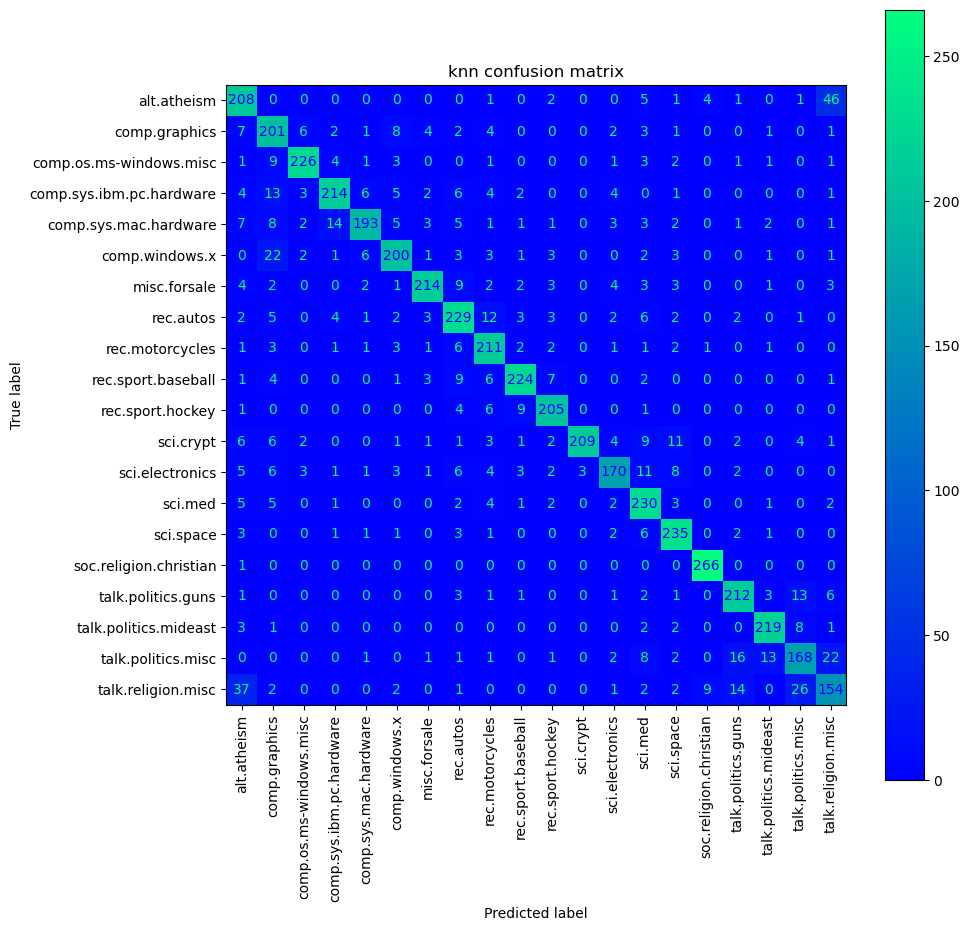

                          precision    recall  f1-score      support
alt.atheism                0.700337  0.773234  0.734982   269.000000
comp.graphics              0.700348  0.827160  0.758491   243.000000
comp.os.ms-windows.misc    0.926230  0.889764  0.907631   254.000000
comp.sys.ibm.pc.hardware   0.880658  0.807547  0.842520   265.000000
comp.sys.mac.hardware      0.901869  0.765873  0.828326   252.000000
comp.windows.x             0.851064  0.803213  0.826446   249.000000
misc.forsale               0.914530  0.845850  0.878850   253.000000
rec.autos                  0.789655  0.826715  0.807760   277.000000
rec.motorcycles            0.796226  0.890295  0.840637   237.000000
rec.sport.baseball         0.896000  0.868217  0.881890   258.000000
rec.sport.hockey           0.879828  0.907080  0.893246   226.000000
sci.crypt                  0.985849  0.794677  0.880000   263.000000
sci.electronics            0.854271  0.742358  0.794393   229.000000
sci.med                    0.76923

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
train_model(knn, train_data, train_label, test_data, test_label, 'knn', eval=True)


Gridsearch for knn model

In [45]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,10,2))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'f1_macro', return_train_score=True)
grid.fit(train_data,train_label)

print(pd.DataFrame(grid.cv_results_))
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
print("grid scores:")
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

KeyboardInterrupt: 

Training time: {'knn': 0.005998, 'svm': 0}s
Prediction time: {'train': 14.296171, 'test': 2.248227, 'val': 1.294978}s
Accuracy score: {'train': 0.8803418803418803, 'test': 0.8405017921146953, 'val': 0.8466644540325258}%
F1 score: {'train': 0.8802238801147073, 'test': 0.839669878577015, 'val': 0.8447480194287375}%


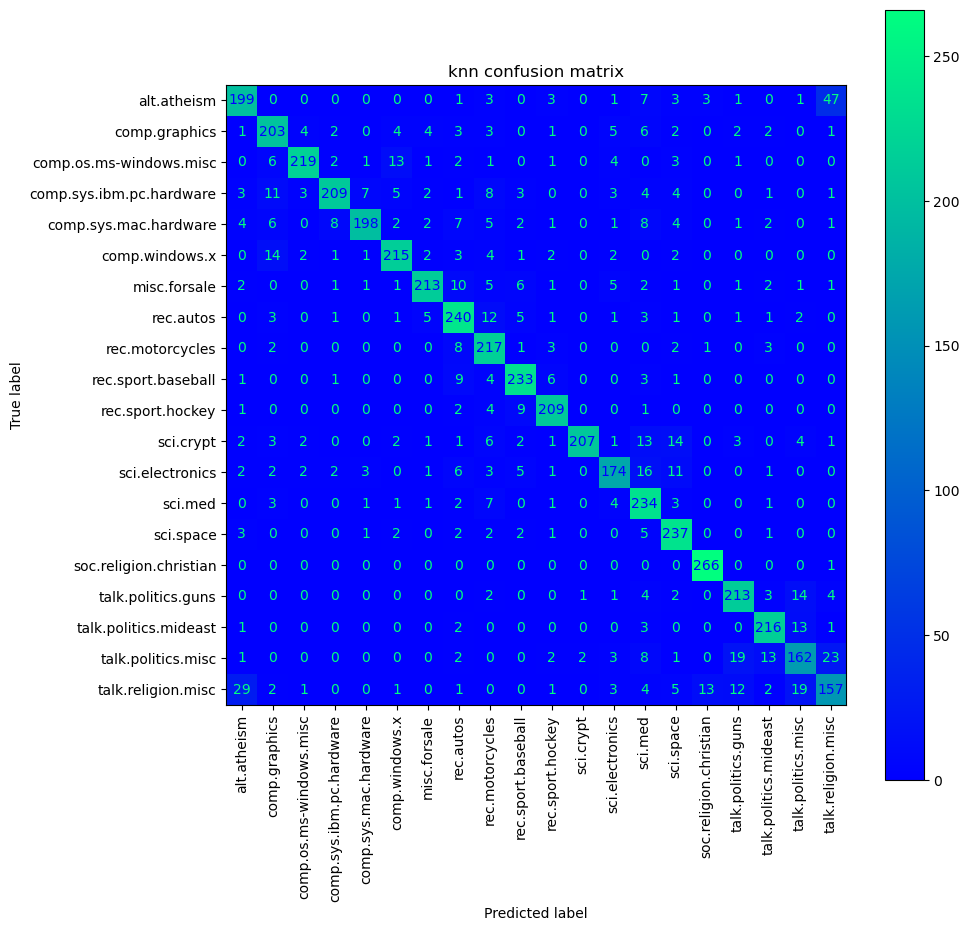

                          precision    recall  f1-score      support
alt.atheism                0.799197  0.739777  0.768340   269.000000
comp.graphics              0.796078  0.835391  0.815261   243.000000
comp.os.ms-windows.misc    0.939914  0.862205  0.899384   254.000000
comp.sys.ibm.pc.hardware   0.920705  0.788679  0.849593   265.000000
comp.sys.mac.hardware      0.929577  0.785714  0.851613   252.000000
comp.windows.x             0.870445  0.863454  0.866935   249.000000
misc.forsale               0.918103  0.841897  0.878351   253.000000
rec.autos                  0.794702  0.866426  0.829016   277.000000
rec.motorcycles            0.758741  0.915612  0.829828   237.000000
rec.sport.baseball         0.866171  0.903101  0.884250   258.000000
rec.sport.hockey           0.889362  0.924779  0.906725   226.000000
sci.crypt                  0.985714  0.787072  0.875264   263.000000
sci.electronics            0.836538  0.759825  0.796339   229.000000
sci.med                    0.72897

In [40]:
train_model(KNeighborsClassifier(n_neighbors=13,weights='uniform'),train_data, train_label, test_data, test_label, 'knn', eval=True)

SVM

Training time: {'knn': 0.005998, 'svm': 11.442473}s
Prediction time: {'train': 31.945309, 'test': 17.564136, 'val': 9.228383}s
Accuracy score: {'train': 0.9757696456725583, 'test': 0.9516129032258065, 'val': 0.9512114171921673}%
F1 score: {'train': 0.9761431781240282, 'test': 0.9516990706982353, 'val': 0.9506125529412282}%


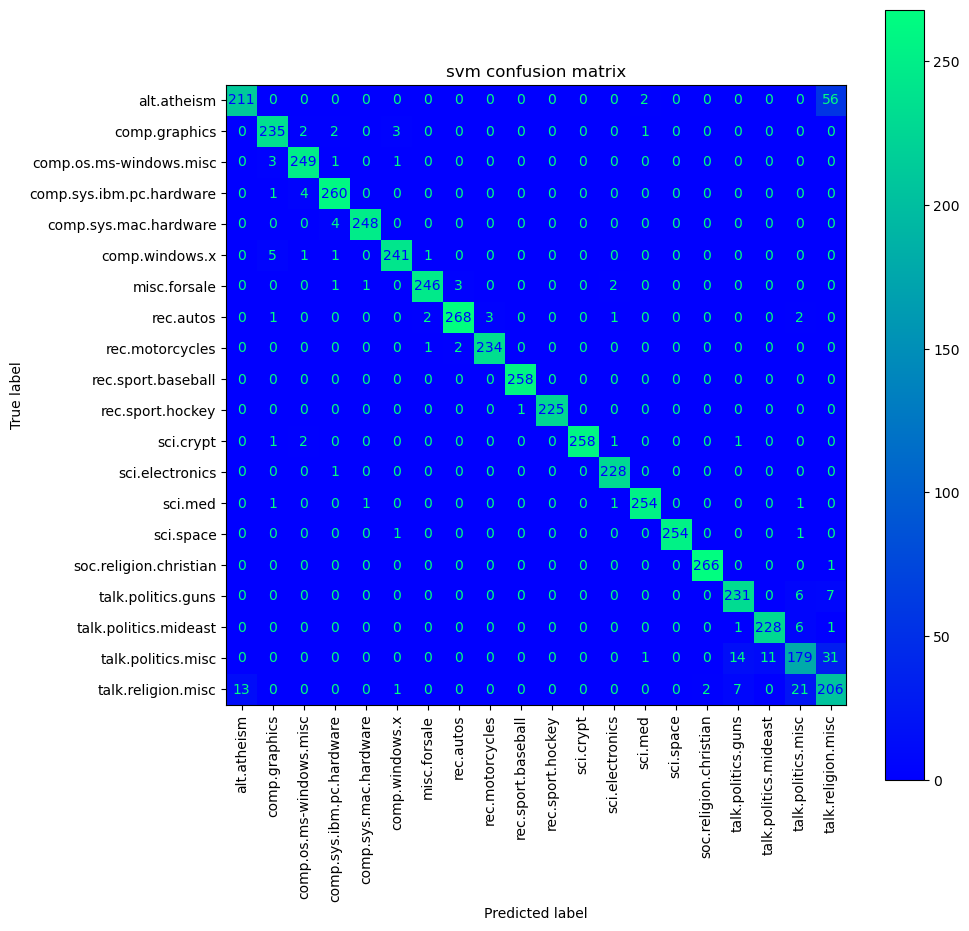

                          precision    recall  f1-score      support
alt.atheism                0.941964  0.784387  0.855984   269.000000
comp.graphics              0.951417  0.967078  0.959184   243.000000
comp.os.ms-windows.misc    0.965116  0.980315  0.972656   254.000000
comp.sys.ibm.pc.hardware   0.962963  0.981132  0.971963   265.000000
comp.sys.mac.hardware      0.992000  0.984127  0.988048   252.000000
comp.windows.x             0.975709  0.967871  0.971774   249.000000
misc.forsale               0.984000  0.972332  0.978131   253.000000
rec.autos                  0.981685  0.967509  0.974545   277.000000
rec.motorcycles            0.987342  0.987342  0.987342   237.000000
rec.sport.baseball         0.996139  1.000000  0.998066   258.000000
rec.sport.hockey           1.000000  0.995575  0.997783   226.000000
sci.crypt                  1.000000  0.980989  0.990403   263.000000
sci.electronics            0.978541  0.995633  0.987013   229.000000
sci.med                    0.98449

In [41]:
from sklearn.svm import SVC
train_model(SVC(), train_data, train_label, test_data, test_label, 'svm', eval=True)

## GridSearch for SVM

In [48]:

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 10, 1000], 
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, cv=3, verbose = 3)
  
# fitting the model for grid search
grid.fit(train_data, train_label)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.946 total time=  37.3s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=  39.8s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=  34.5s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.102 total time=  47.5s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.102 total time=  44.3s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.103 total time=  44.5s
[CV 1/3] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.102 total time=  44.9s
[CV 2/3] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.102 total time=  42.9s
[CV 3/3] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.102 total time=  44.3s
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.948 total time=  13.1s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.952 total time=  12.8s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 10, 1000], 'gamma': [1, 0.01, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [52]:
print(pd.DataFrame(grid.cv_results_))
print (grid.best_params_)
print (grid.best_estimator_)
print("grid scores:")
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      18.392938      2.581271        18.928222        1.932333     0.1   
1      26.744571      1.996625        18.803669        0.704715     0.1   
2      25.501340      0.616826        18.608468        0.524876     0.1   
3       4.193884      0.151451         8.502934        0.511621      10   
4      13.549448      0.982961        15.593531        0.249645      10   
5      29.163710      0.876211        19.930311        0.448977      10   
6       5.018197      0.445180         9.950657        0.516183    1000   
7       4.144393      0.607188         8.070719        0.863989    1000   
8      12.746264      1.118370        14.114859        0.458156    1000   

  param_gamma param_kernel                                         params  \
0           1          rbf        {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}   
1        0.01          rbf     {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}   
2      0.0001     

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

Training time: {'knn': 0.005998, 'svm': 7.098829}s
Prediction time: {'train': 28.406543, 'test': 13.068472, 'val': 6.538513}s
Accuracy score: {'train': 0.9809144469338644, 'test': 0.948626045400239, 'val': 0.9502157318287421}%
F1 score: {'train': 0.9812239670107129, 'test': 0.9487793100967794, 'val': 0.949297722654215}%


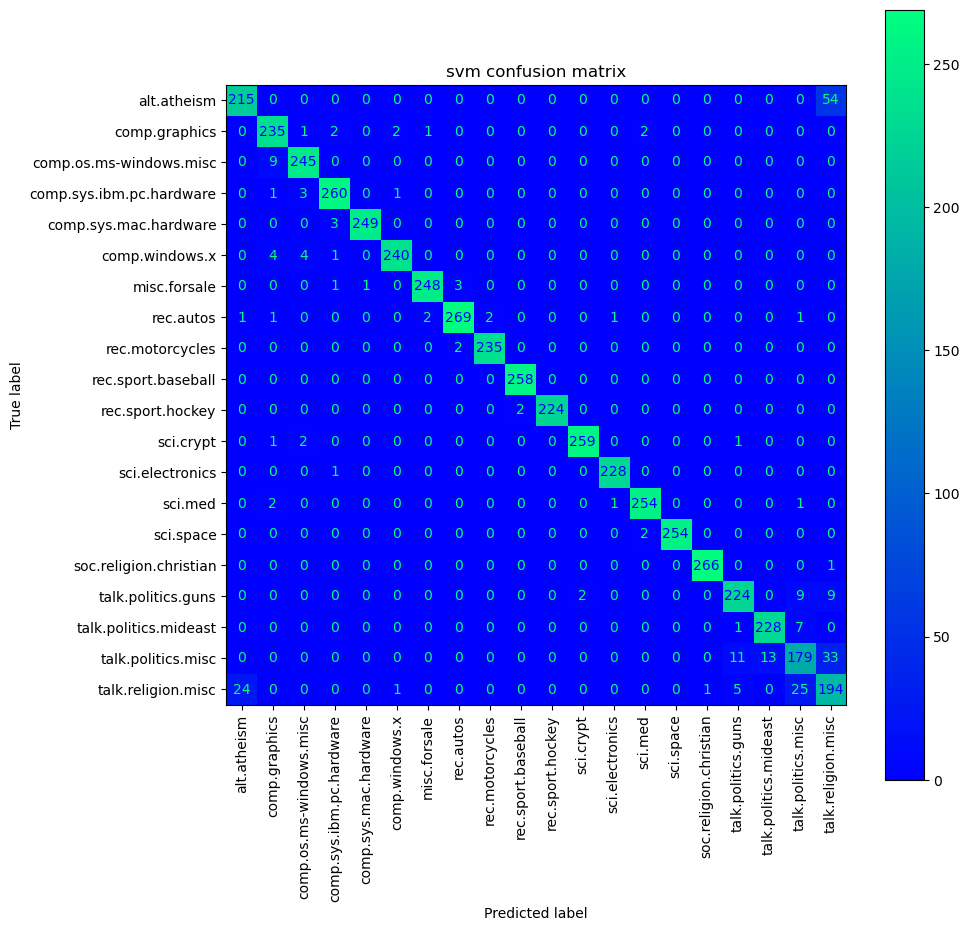

                          precision    recall  f1-score      support
alt.atheism                0.895833  0.799257  0.844794   269.000000
comp.graphics              0.928854  0.967078  0.947581   243.000000
comp.os.ms-windows.misc    0.960784  0.964567  0.962672   254.000000
comp.sys.ibm.pc.hardware   0.970149  0.981132  0.975610   265.000000
comp.sys.mac.hardware      0.996000  0.988095  0.992032   252.000000
comp.windows.x             0.983607  0.963855  0.973631   249.000000
misc.forsale               0.988048  0.980237  0.984127   253.000000
rec.autos                  0.981752  0.971119  0.976407   277.000000
rec.motorcycles            0.991561  0.991561  0.991561   237.000000
rec.sport.baseball         0.992308  1.000000  0.996139   258.000000
rec.sport.hockey           1.000000  0.991150  0.995556   226.000000
sci.crypt                  0.992337  0.984791  0.988550   263.000000
sci.electronics            0.991304  0.995633  0.993464   229.000000
sci.med                    0.98449

In [53]:
train_model(SVC(C=10, gamma=1, kernel='rbf'), train_data, train_label, test_data, test_label, 'svm', eval=True)